**本实验首先爬取一个股票名称，然后获取列表里的每支股票的信息**

### 步骤1 爬取股票列表信息

假如我们想爬取**创业板**的数据信息，可以选中并右键点击审查，然后可以显示网页源码，再点击Source模块，可以看到网页请求服务器时的url配置，单击配置可以返回请求结果（json文件），其中f12为股票代码，而f14位股票名称，可以提取这两个信息供我们后续处理

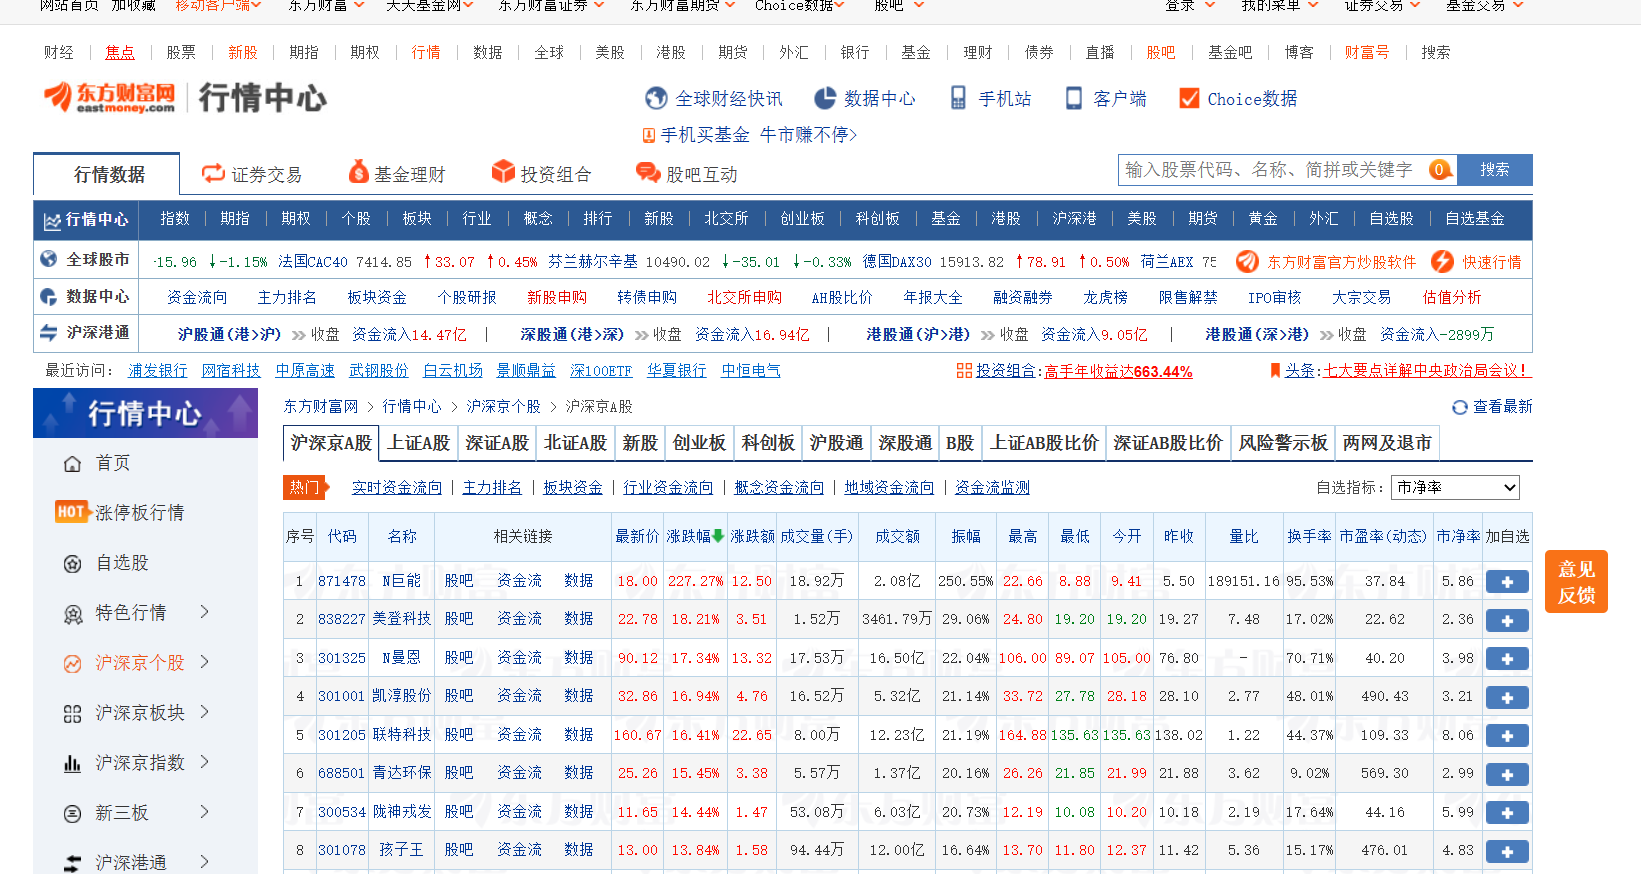
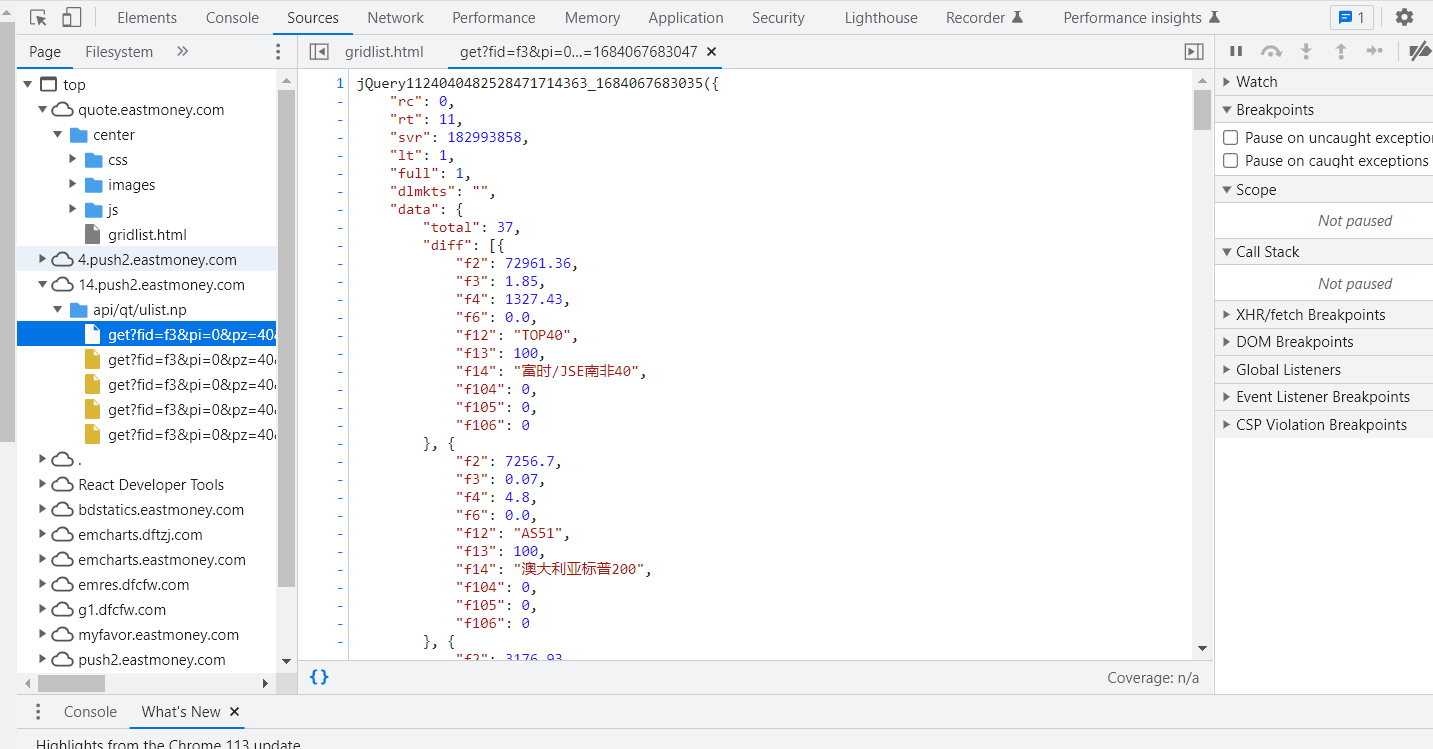

In [3]:
# https://quote.eastmoney.com/center/gridlist.html
# 爬取页面股票信息

import requests
from fake_useragent import UserAgent
from bs4 import BeautifulSoup
import json
import csv

# 获取指定url页面的内容
def getHtml(url):
    r=requests.get(url,headers={
        'User-Agent':UserAgent().random,
    })
    r.encoding =r.apparent_encoding
    return r.text
#num为爬取多少条记录
num=20
#该地址为页面实际获取数据的接口地址
stockUrl='http://99.push2.eastmoney.com/api/qt/clist/get?cb=jQuery112408733409809437476_1623137764048&pn=1&pz=20&po=1&np=1&ut=bd1d9ddb04089700cf9c27f6f7426281&fltt=2&invt=2&fid=f3&fs=m:0+t:80&fields=f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f12,f13,f14,f15,f16,f17,f18,f20,f21,f23,f24,f25,f22,f11,f62,f128,f136,f115,f152&_=1623137764167:formatted'
if __name__ == '__main__':
    responseText=getHtml(stockUrl)
    jsonText=responseText.split("(")[1].split(")")[0]# 将 `responseText` 字符串按照左括号 "(" 进行分割，并取得左括号后面的字符串。然后再按右括号 ")" 进行分割，并取得右括号前面的字符串。这两部分字符串之间的内容就是JSON格式的数据。
    resjson=json.loads(jsonText)
    datas=resjson["data"]["diff"]
    datalist=[]
    #数据解析
    for data in datas:
        row=[data["f12"],data["f14"]]
        datalist.append(row)
    print(datalist)

    #将股票代码和名称保存在csv中
    f=open('stock.csv','w+',encoding='utf-8',newline="")
    writer =csv.writer(f)
    writer.writerow(('代码','名称'))
    for data in datalist:
        writer.writerow((data[0]+"\t",data[1]+"\t"))
    f.close()

[['301325', 'N曼恩'], ['301001', '凯淳股份'], ['301205', '联特科技'], ['300534', '陇神戎发'], ['301078', '孩子王'], ['301162', '国能日新'], ['301088', '戎美股份'], ['300937', '药易购'], ['301293', '三博脑科'], ['300013', '新宁物流'], ['300056', '中创环保'], ['301378', '通达海'], ['301211', '亨迪药业'], ['300781', '因赛集团'], ['300710', '万隆光电'], ['300303', '聚飞光电'], ['300469', '信息发展'], ['301276', '嘉曼服饰'], ['300682', '朗新科技'], ['301110', '青木股份']]


### 步骤2，股票数据获取
逐个下载股票数据，根据观察，每支股票的历史数据由4部分构成：头rul，上市地（深市沪市），股票代码，尾url，只需要组合好上述url，即可获得csv格式的数据并下载

In [5]:
import csv
import urllib.request as r
import threading

#读取之前获取的股票csv，放入一个列表中
def getStocklist():
    stocklist=[]
    f=open('stock.csv','r',encoding='utf-8')
    f.seek(0)
    reader=csv.reader(f)
    for item in reader:
        stocklist.append(item)
    f.close()
    return stocklist

# 根据url下载文件，保存于filepath中
def downloadfile(url,filepath):
    try:
        r.urlretrieve(url,filepath)
    except Exception as e:
        print(e)
        print(filepath,"is downloaded")
        pass

# 设置信号量，控制线程并发数，多线程下载
sem=threading.Semaphore(1)
def downloadFilesem(url,filepath):
    with sem:
        downloadfile(url,filepath)
#定义头信号量，尾信号量
urlStart = 'http://quotes.money.163.com/service/chddata.html?code='
urlEnd = '&end=20210221&fields=TCLOSE;HIGH;LOW;TOPEN;LCLOSE;CHG;PCHG;VOTURNOVER;VATURNOVER'

#主程序，下载各股票的历史数据
if __name__ == '__main__':
	stockList = getStocklist()
	stockList.pop(0)
	print(stockList)
	for s in stockList:
		scode = str(s[0].split("\t")[0])
		#0：沪市；1：深市
		url = urlStart + ("0" if scode.startswith('6') else "1") + scode + urlEnd
		print(url)
		filepath = (str(s[1].split("\t")[0])+"_"+scode) + ".csv"
		threading.Thread(target=downloadFilesem,args=(url,filepath)).start()

[['301325\t', 'N曼恩\t'], ['301001\t', '凯淳股份\t'], ['301205\t', '联特科技\t'], ['300534\t', '陇神戎发\t'], ['301078\t', '孩子王\t'], ['301162\t', '国能日新\t'], ['301088\t', '戎美股份\t'], ['300937\t', '药易购\t'], ['301293\t', '三博脑科\t'], ['300013\t', '新宁物流\t'], ['300056\t', '中创环保\t'], ['301378\t', '通达海\t'], ['301211\t', '亨迪药业\t'], ['300781\t', '因赛集团\t'], ['300710\t', '万隆光电\t'], ['300303\t', '聚飞光电\t'], ['300469\t', '信息发展\t'], ['301276\t', '嘉曼服饰\t'], ['300682\t', '朗新科技\t'], ['301110\t', '青木股份\t']]
http://quotes.money.163.com/service/chddata.html?code=1301325&end=20210221&fields=TCLOSE;HIGH;LOW;TOPEN;LCLOSE;CHG;PCHG;VOTURNOVER;VATURNOVER
http://quotes.money.163.com/service/chddata.html?code=1301001&end=20210221&fields=TCLOSE;HIGH;LOW;TOPEN;LCLOSE;CHG;PCHG;VOTURNOVER;VATURNOVER
http://quotes.money.163.com/service/chddata.html?code=1301205&end=20210221&fields=TCLOSE;HIGH;LOW;TOPEN;LCLOSE;CHG;PCHG;VOTURNOVER;VATURNOVER
http://quotes.money.163.com/service/chddata.html?code=1300534&end=20210221&fields=TCLOSE;HIGH;LOW